In [ ]:
from utils import *

In [ ]:
img = np.zeros((256, 256), np.uint8)
for i in range(256):
    img[i:i+1] = i
img = img.T
img = img.reshape((256, 256, 1))
# saveImage(img, "./input/gradient.png", cvt=False)
showImage_cv("", img, cvt=False)
# showImage(img)


0

In [ ]:
for i in [
    cv.THRESH_BINARY,
    cv.THRESH_BINARY_INV,
    cv.THRESH_TRUNC,
    cv.THRESH_TOZERO,
    cv.THRESH_TOZERO_INV,
]:
    ret, thresh = cv.threshold(img, 127, 255, i)
    print(ret)
    showImage_cv(str(i), thresh, cvt=False)

127.0
127.0
127.0
127.0
127.0


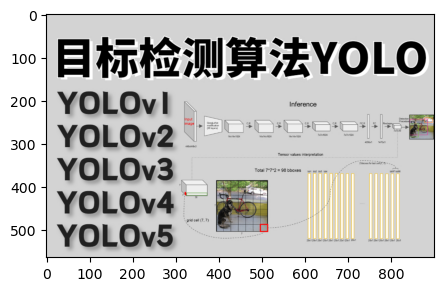

In [ ]:
img = readImage("./input/test.png").astype(np.uint8)
showImage(img)

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage_cv("", img_gray)

0

In [ ]:
thresh = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
showImage_cv("", thresh)

0

## Otus Binary

In [ ]:
# 全局阈值
ret,thresh = cv.threshold(img_gray,127,255,cv.THRESH_BINARY)
print(ret)
showImage_cv("", thresh, cvt=False)


127.0


0

In [ ]:
# Otsu阈值
ret,thresh = cv.threshold(img_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret)
showImage_cv("", thresh, cvt=False)


116.0


0

In [ ]:
# 高斯滤波后再采用Otsu阈值
blur = cv.GaussianBlur(img_gray,(5,5),0)
ret,thresh = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret)
showImage_cv("", thresh, cvt=False)


121.0


0

In [ ]:
blur = cv.GaussianBlur(img_gray, (5, 5), 0)

# 寻找归一化直方图和对应的累积分布函数
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1, 256):
    p1,p2 = np.hsplit(hist_norm,[i]) # 概率
    q1,q2 = Q[i],Q[255]-Q[i] # 对类求和
    b1,b2 = np.hsplit(bins,[i]) # 权重
    # 寻找均值和方差
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # 计算最小化函数
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

C:\Users\25335\AppData\Local\Temp\ipykernel_24500\2179201370.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\25335\AppData\Local\Temp\ipykernel_24500\2179201370.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  fn = v1*q1 + v2*q2


In [ ]:
ret, thresh
showImage_cv("", otsu)

0